# Working

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("src/")

In [2]:

from src.data import get_track , getBatch
from src.model import PCT_Transformer
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
aPaths = glob.glob("data/*AllPSA.npy")
hpaths = glob.glob("data/*.hits.npy")
ap = np.random.choice(aPaths)
hp = np.random.choice(hpaths)
trk =  get_track(apth=ap,hpth=hp)
batch = getBatch(trk,batch_size=32)
X = batch[:,:,2:5]
Y = batch[:,:,5:]
model = PCT_Transformer()

# Experiment

In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False))

In [4]:
loss = np.load("losses/2023_05_10-14_34_loss.npy")

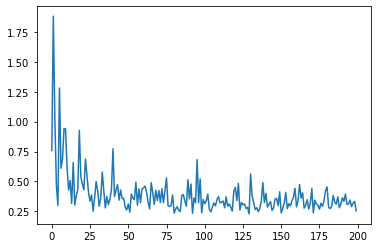

In [5]:
plt.title("Loss function of PCT Transformer")
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
